In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
dataset = pd.read_csv("50_Startups.csv")
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values
X,y

(array([[165349.2 , 136897.8 , 471784.1 ],
        [162597.7 , 151377.59, 443898.53],
        [153441.51, 101145.55, 407934.54],
        [144372.41, 118671.85, 383199.62],
        [142107.34,  91391.77, 366168.42],
        [131876.9 ,  99814.71, 362861.36],
        [134615.46, 147198.87, 127716.82],
        [130298.13, 145530.06, 323876.68],
        [120542.52, 148718.95, 311613.29],
        [123334.88, 108679.17, 304981.62],
        [101913.08, 110594.11, 229160.95],
        [100671.96,  91790.61, 249744.55],
        [ 93863.75, 127320.38, 249839.44],
        [ 91992.39, 135495.07, 252664.93],
        [119943.24, 156547.42, 256512.92],
        [114523.61, 122616.84, 261776.23],
        [ 78013.11, 121597.55, 264346.06],
        [ 94657.16, 145077.58, 282574.31],
        [ 91749.16, 114175.79, 294919.57],
        [ 86419.7 , 153514.11,      0.  ],
        [ 76253.86, 113867.3 , 298664.47],
        [ 78389.47, 153773.43, 299737.29],
        [ 73994.56, 122782.75, 303319.26],
        [ 6

In [30]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)
X_test.shape

(13, 3)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 0.77921434, -0.01367008,  0.03969324])

In [6]:
y_pred = model.predict(X_test)
y_pred

array([117079.54871893, 109410.92992842, 159759.54082311, 100644.50285476,
       134359.50608724, 116982.4997106 , 115821.42900323, 171380.21714578,
        75007.13494004,  97715.4909547 , 134466.48254039, 101024.26020694,
       112603.98295889])

In [7]:
r2_score(y_test,y_pred)

0.9220828643288373

In [31]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [44]:
#  tree = DTR(max_leaf_nodes=5, random_state=0)
# tree.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=5, random_state=0)

In [45]:
# ypred = tree.predict(X_test)

In [46]:
# r2_score(y_test,ypred)

0.6228878699275485

In [53]:

for i in range(2,15):
    
    tree = DTR(max_leaf_nodes=i, random_state=0)
    tree.fit(X_train,y_train)
    ypred = tree.predict(X_test)
    acc.append(r2_score(y_test,ypred))

In [54]:
acc


[0.12479596864301368,
 0.617314084154116,
 0.6228878699275485,
 0.6228878699275485,
 0.703031294932625,
 0.8145193777260897,
 0.8145193777260897,
 0.8145193777260897,
 0.8521842393879471,
 0.8521842393879471,
 0.8663819895584155,
 0.8716448245062844,
 0.8716448245062844]

In [58]:
index = [i for i in range(2,15)]
index

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

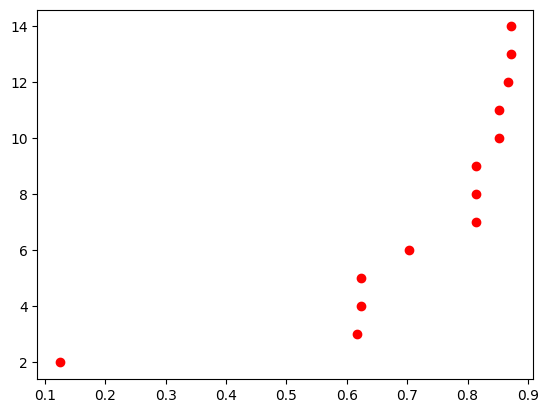

In [59]:
import matplotlib.pyplot as plt
plt.scatter(acc, index, color='r')